In [1]:
#import necessary modules
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r'X:\Downloads\PRG4206 Machine Learning\Group\depress.csv')

In [3]:
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [4]:
#preprocessing data
#take out rows with null values
df = df.dropna()

#separate into data (fetures only) and target (goal)
data = df.drop(columns=['depressed'])  #features only. remove the target column
target = df['depressed'].values   #the target only aka 'depressed or not?'

print("\nSize of our data: {}".format(df.shape))


Size of our data: (1409, 23)


Feature: 0, Score: 0.05064
Feature: 1, Score: 0.01186
Feature: 2, Score: 0.01371
Feature: 3, Score: 0.01581
Feature: 4, Score: 0.06411
Feature: 5, Score: 0.06431
Feature: 6, Score: 0.01310
Feature: 7, Score: 0.01296
Feature: 8, Score: 0.01401
Feature: 9, Score: 0.01555
Feature: 10, Score: 0.01386
Feature: 11, Score: 0.09865
Feature: 12, Score: 0.01393
Feature: 13, Score: 0.05677
Feature: 14, Score: 0.01314
Feature: 15, Score: 0.06333
Feature: 16, Score: 0.01080
Feature: 17, Score: 0.19074
Feature: 18, Score: 0.11795
Feature: 19, Score: 0.04424
Feature: 20, Score: 0.01316
Feature: 21, Score: 0.08734


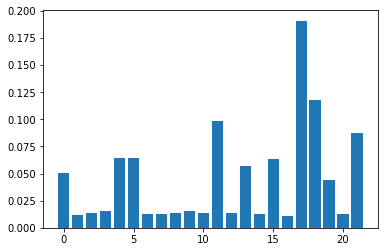

In [5]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1409, n_features=22, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [6]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [7]:
# define the dataset
X, y = make_classification(n_samples=1409, n_features=22, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


In [8]:
#building random forest model with hyperparameters

#generating random estimators
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [9]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [10]:
#create model  
rf_Model = RandomForestClassifier()

In [11]:
#using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid,n_iter =100, cv = 10, verbose=2, n_jobs = 1)

In [12]:
rf_RandomGrid.fit(X_train_fs, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total tim

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=2)

In [13]:
rf_RandomGrid.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

In [14]:
print('With RandomizedSearch')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test_fs,y_test):.3f}')

With RandomizedSearch
Test Accuracy - : 0.912


In [15]:
#use the forest's predict method on the test data
prediction = rf_RandomGrid.predict(X_test_fs)

print(prediction)

[0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1
 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1]


In [16]:
#import scikit-learn metrics module for accuract testing
from sklearn import metrics

#model accuracy, how often is the classifier correct?
#compare predicted values to the actual target value in y_test set

print("Accuracy (Optimized + Feature Reduction): ", metrics.accuracy_score(y_test, prediction))

Accuracy (Optimized - RandomizedSearch):  0.9118279569892473


In [17]:
#Evaluation metrics
#Constructing the confusion matrix.
from sklearn. metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[209,  19],
       [ 22, 215]], dtype=int64)

In [18]:
from sklearn.tree import export_graphviz
import pydot
import pydotplus

feature_list = list(data.columns)

tree = rf_RandomGrid.best_estimator_[5]
export_graphviz(tree, out_file = "tree.dot", filled = True, feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('RandomForestOptimizedRandomizedSearch.png')

#display the image
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
img=pltimg.imread('RandomForestOptimizedRandomizedSearch.png')
imgplot = plt.imshow(img)
plt.show()

ValueError: Length of feature_names, 22 does not match number of features, 9

In [ ]:
import mglearn

mglearn.discrete_scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train)

In [ ]:
mglearn.discrete_scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test)

In [ ]:
mglearn.discrete_scatter(prediction, prediction, y_test)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(rf_RandomGrid.best_estimator_[5], 
                           feature_names=feature_list,
                           class_names="target", 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph